In [16]:
# MNIST 이미지 데이터 학습하기

# 필요한 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 그림으로 표현해보자


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


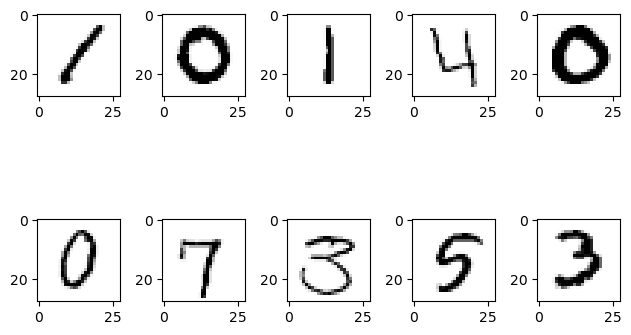

In [17]:
# Raw Data Loading
# 이 데이터에는 결측치, 이상치가 없다.
df = pd.read_csv('./data/digit-recognizer/train.csv')
display(df.head(), df.shape) # (42000, 785)

# 이미지 확인
img_data = df.drop('label', axis=1, inplace=False).values
print(img_data)
# 그림으로 확인해보자.
fig = plt.figure()
fig_arr = []

# interpolation은 보간법을 뜻하며, 픽셀들의 축 위치 간격을 보정하여 이미지가 자연스러운 모양으로 
# 보일 수 있게 하는 방법입니다. 
# imshow()에서는 16가지 보간법이 있고, 'nearest'는 가장 고해상도인 보간법입니다.

for n in range(10):
    fig_arr.append(fig.add_subplot(2,5,n+1))
    fig_arr[n].imshow(img_data[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    
plt.tight_layout()
plt.show()

In [19]:
# 이 데이터를 이용해서 머신러닝을 해보자.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Training Data Set

# 1. 학습데이터와 테스트데이터 분리
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False).values,
                df['label'].values,
                test_size=0.2)

# 2. 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

# 3. one-hot 처리는 따로 하지 않는다. keras를 이용해서 처리할 예정
# 앞으로도 one-hot은 안 하려고 한다.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Model 생성
model = Sequential()

# Model에 Layer를 추가
model.add(Flatten(input_shape=(784,)))
#     28 * 28 = 784
model.add(Dense(10, activation='softmax'))
#     클래스의 개수 : 0~9 10개

# Model 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# model 학습
model.fit(x_data_train_norm, t_data_train, epochs=50,
          validation_split=0.2, verbose=1, batch_size=100)
# batch_size
#     아주 큰 데이터일 때, 프로그램을 부분적으로 잘라서 수행


Epoch 1/50
269/269 [==============================] - 1s 2ms/step - loss: 1.9194 - accuracy: 0.4440 - val_loss: 1.5616 - val_accuracy: 0.6717
Epoch 2/50
269/269 [==============================] - 0s 1ms/step - loss: 1.3176 - accuracy: 0.7422 - val_loss: 1.1392 - val_accuracy: 0.7798
Epoch 3/50
269/269 [==============================] - 0s 1ms/step - loss: 1.0074 - accuracy: 0.8035 - val_loss: 0.9126 - val_accuracy: 0.8179
Epoch 4/50
269/269 [==============================] - 0s 1ms/step - loss: 0.8324 - accuracy: 0.8305 - val_loss: 0.7767 - val_accuracy: 0.8363
Epoch 5/50
269/269 [==============================] - 0s 1ms/step - loss: 0.7221 - accuracy: 0.8463 - val_loss: 0.6872 - val_accuracy: 0.8476
Epoch 6/50
269/269 [==============================] - 0s 1ms/step - loss: 0.6463 - accuracy: 0.8579 - val_loss: 0.6229 - val_accuracy: 0.8558
Epoch 7/50
269/269 [==============================] - 0s 1ms/step - loss: 0.5908 - accuracy: 0.8660 - val_loss: 0.5749 - val_accuracy: 0.8624
Epoch 

In [21]:
# 우리 모델에 대한 마지막 평가
print(model.evaluate(x_data_test_norm, t_data_test))
#     왼쪽 : loss, 오른쪽 : accuracy


263/263 [==============================] - 0s 805us/step - loss: 0.3098 - accuracy: 0.9140
[0.30980002880096436, 0.9140475988388062]


In [23]:
# Fashion MNIST 데이터를 이용해서 같은 작업을 진행하자.
# 이미지가 복잡해질때 정확도가 얼마나 떨어지는지 확인
# 약 84%

# 결론적으로 말하면...
# 비정형 데이터는 일반 머신러닝 기법을 이용하면 학습에 효율이 떨어진다.
#     => 뉴럴 네트워크 사용해야 한다.


## ANN 사용해보자

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model 생성
model = Sequential()

# Model에 Layer를 추가

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Hidden Layer ( Hidden Layer의 activation은 relu로 잡아줘야된다.)
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(64, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))

print(model.summary())

# Model 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# model 학습
model.fit(x_data_train_norm, t_data_train, epochs=50,
          validation_split=0.2, verbose=1, batch_size=100)
# batch_size
#     아주 큰 데이터일 때, 프로그램을 부분적으로 잘라서 수행


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)               

Epoch 49/50
269/269 [==============================] - 1s 5ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0892 - val_accuracy: 0.9744
Epoch 50/50
269/269 [==============================] - 1s 5ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0932 - val_accuracy: 0.9743


In [27]:
# 우리 모델에 대한 마지막 평가
print(model.evaluate(x_data_test_norm, t_data_test))


263/263 [==============================] - 0s 973us/step - loss: 0.1058 - accuracy: 0.9705
[0.10583429038524628, 0.9704762101173401]


# 7교시


NameError: name 'history' is not defined

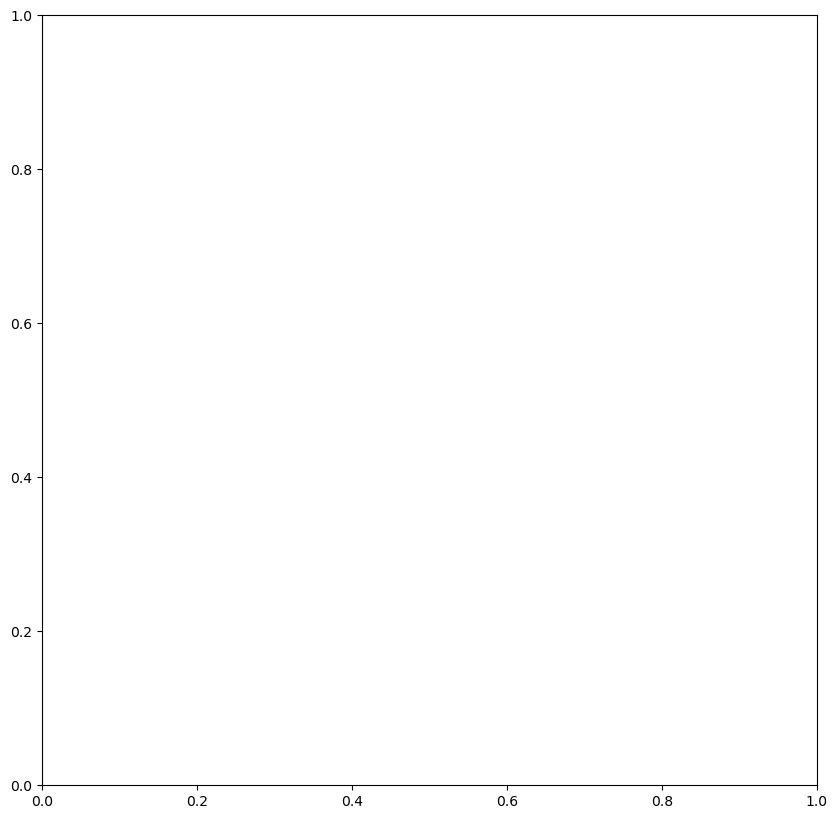

In [30]:
# 학습과정을 그래프로 한 번 살펴보아요!
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig_acc = fig.add_subplot(1, 1, 1)

# epoch이 증가할 때마다 나오는 accuracy, val_accuracy를 그래프로 그려보자
fig_acc.plot(history.history['accuracy'], color='b')
fig_acc.plot(history.history['val_accuracy'], color='r')
# accuracy
#     학습 데이터로 학습하고, 학습 데이터로 평가한 결과
# val_accuracy
#     학습 데이터로 학습하고, 평가 데이터로 평가한 결과


In [ ]:
# 몇 번을 돌려야할 지 모른다. => Epoch의 수를 결정하기가 쉽지 않다.
# 그럼 계속 대입을 해봐야할까?
# 자동으로 Epoch을 진행하는 Mechanism이 필요하다
#     => Early Stopping(조기 종료) 기능 제공(Keras)
# 위쪽에 코드 추가하자.


In [ ]:


my_early_stopping = EarlyStopping(monitor='val_loss',
                                 patience=3,
                                 mode='auto',
                                 restore_best_weights=True)

# restore_best_weights
#     결과값이 가장 좋았던 가중치 값을 복원한다.




# Model 설정 에 callbacks 속성 추가
